# APVC – Exercícios – Redes neuronais 

### imports

In [10]:
import pandas as pd
import numpy as np

# estes imports também deverão ser necessários
import matplotlib.pyplot as plt
import keras
from keras import layers

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## Exercício 1 (Rede neuronal para classificação multiclasse)

Neste exercício vai tomar um contacto maior com a construção, treino e visualização dos resultados de um classificador implementado com uma rede neuronal. Para tal irá explorar o script utilizado durante a demonstração feita na aula: wineNet.py.

Recorde que  neste problema pretende-se identificar  o fabricante de vinho com base em características químicas do próprio vinho. O dataset utilizado é o WineData1, que consiste em amostras de 178 vinhos produzidos por 3 fabricantes diferentes.

> Nota:
> - Neste exercício, para além do script wineNet.py, irá precisar de colocar o ficheiro wineData.csv na mesma localização em que for executado o script.

1) Verifique as dimensões dos conjuntos x_train e y_train, usando o atributo shape das matrizes numpy. Visualize o conteúdo das 5 primeiras linhas de cada uma das matrizes. Interprete a organização das matrizes.

In [11]:
# leitura do ficheiro com os dados
data = np.array(pd.read_csv("datasets/wineData.csv", sep=";"))

# n. de amostras e n. de features
nSamples = data.shape[0]
nFeatures = data.shape[1]-1

# "baralhar" as amostras (mas sempre da mesma maneira)
SEED = 12345
np.random.seed(SEED)
data = np.random.permutation(data)

# separar as features das classificações (labels)
features = data[:, 0:nFeatures]
labels = data[:, nFeatures].astype(int) - 1

# colocar as labels no formato adequado para treino (matriz N x C)
labels = keras.utils.to_categorical(labels, 3)

# divisão treino/validação (80% treino - 20% validação)
SPLIT = features.shape[0] * 8 // 10
x_train = features[:SPLIT, :]
y_train = labels[:SPLIT, :]
x_val = features[SPLIT + 1:, :]
y_val = labels[SPLIT + 1:, :]

In [12]:
# Dimensão do conjunto de treino
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')

x_train: (141, 13)
y_train: (141, 3)


2) Visualize  o  sumário  do  modelo.  Interprete  a  informação  que  é  apresentada  e justifique com cálculos a razão para haver 280 parâmetros para treinar na camada “escondida” e 63 na camada de output (note que estes parâmetros são os pesos das ligações aos neurónios). 

In [13]:
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=SEED)

# definição da arquitetura da rede neuronal
wine_model = keras.Sequential([
    layers.Input((13,)),
    layers.Dense(20, activation='relu', kernel_initializer=initializer),
    layers.Dense(3, activation='softmax', kernel_initializer=initializer)
])

# mostrar um sumário do modelo (organização e n. de pesos a otimizar em cada camada)
wine_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343 (1.34 KB)

 Trainable params: 343 (1.34 KB)

 Non-trainable params: 0 (0.00 B)

3) Experimente  treinar  com  variações  aos  seguintes  parâmetros,  verificando  o  que acontece aos resultados, assim como à estabilidade e rapidez de convergência no processo de treino:

a) Taxa de aprendizagem do algoritmo de otimização (learning_rate) – utilize por exemplo 0.01. e 0.0001. 


In [16]:
# Compilação do modelo com learning rate de 0.01
wine_model.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["accuracy"])


In [6]:
# Compilação do modelo com learning rate de 0.001
wine_model.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])

b) Parâmetro batch_size na função fit(...). Use um valor mais baixo (4) e um 
valor mais alto (64). 


In [7]:
# Batch Size de 4
h = wine_model.fit(x_train, y_train, batch_size=4, epochs=500,
                        validation_data=(x_val, y_val))

Epoch 1/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3216 - loss: 2.7186 - val_accuracy: 0.2571 - val_loss: 1.2346
Epoch 2/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.4245 - loss: 1.0797 - val_accuracy: 0.2571 - val_loss: 1.1617
Epoch 3/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3449 - loss: 1.1103 - val_accuracy: 0.3429 - val_loss: 1.0308
Epoch 4/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4601 - loss: 0.9521 - val_accuracy: 0.5143 - val_loss: 0.8601
Epoch 5/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5778 - loss: 0.8066 - val_accuracy: 0.5714 - val_loss: 0.8172
Epoch 6/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.5952 - loss: 0.7909 - val_accuracy: 0.5714 - val_loss: 0.8557
Epoch 7/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.6643 - loss: 0.7791 - val_accuracy: 0.5714 - val_loss: 0.7972
Epoch 8/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7627 - loss: 0.6575 - val_accuracy

In [17]:
# Batch Size de 64
h = wine_model.fit(x_train, y_train, batch_size=64, epochs=500,
                        validation_data=(x_val, y_val))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3135 - loss: 55.8189 - val_accuracy: 0.3143 - val_loss: 76.0468
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2887 - loss: 59.1983 - val_accuracy: 0.2571 - val_loss: 34.8341
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5073 - loss: 30.8435 - val_accuracy: 0.4857 - val_loss: 46.7610
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5618 - loss: 42.9139 - val_accuracy: 0.5429 - val_loss: 38.6833
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6602 - loss: 31.3142 - val_accuracy: 0.5429 - val_loss: 23.2671
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5955 - loss: 18.4325 - val_accuracy: 0.4000 - val_loss: 9.7207
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6102 - loss: 7.4020 - val_accuracy: 0.7143 - val_loss: 0.7532
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5086 - loss: 2.6159 - val_accuracy: 0.3143 - val_l

c) Número de neurónios da camada escondida da rede – altere para 3 neurónios e para um número exageradamente alto (e.g., 300).

In [ ]:
# Número de Neurónios escondidos da rede - 3
wine_model = keras.Sequential([
    layers.Input((13,)),
    layers.Dense(3, activation='relu', kernel_initializer=initializer),
    layers.Dense(3, activation='softmax', kernel_initializer=initializer)
])

In [14]:
# Número de Neurónios escondidos da rede - 300
wine_model = keras.Sequential([
    layers.Input((13,)),
    layers.Dense(300, activation='relu', kernel_initializer=initializer),
    layers.Dense(3, activation='softmax', kernel_initializer=initializer)
])

4) Será que são necessárias 500 épocas para treinar o modelo?  Justifique com base nos gráficos. 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


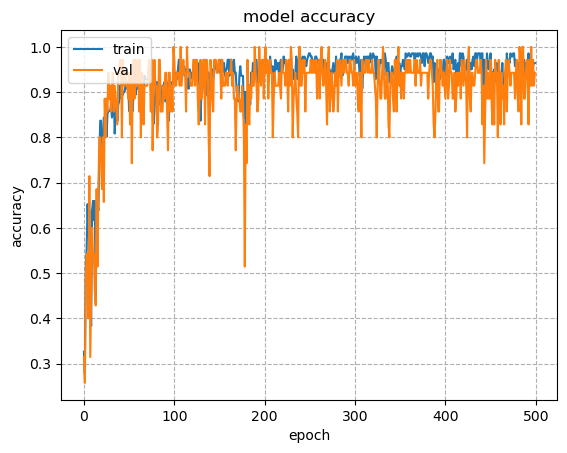

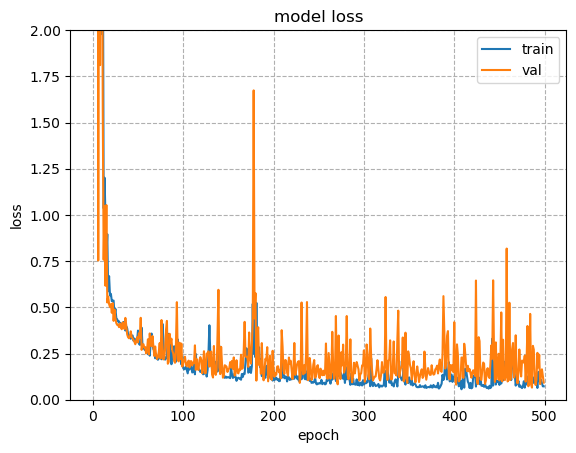

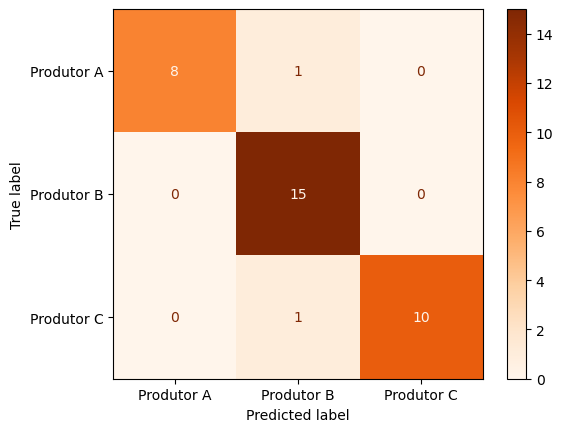

In [ ]:
# Obter e mostrar resultados

# obter os id's das classes verdadeiras
y_true = np.argmax(y_val, axis=1)

# realizar as previsões e obter os id's das classes preditas
output_pred = wine_model.predict(x_val)    # ou então, output_pred = wineModel(x_val)
y_pred = np.argmax(output_pred, axis=1)

# gerar uma matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# mostrar figuras - accuracy, loss e matriz de confusão
plt.figure(num=1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.grid(True, ls='--')

plt.figure(num=2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylim(0, 2.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper right")
plt.grid(True, ls='--')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Produtor A", "Produtor B", "Produtor C"])
disp.plot(cmap=plt.colormaps['Oranges'])
plt.show()

In [18]:
# Acessar a loss e a accuracy final do treinamento
final_loss = h.history['loss'][-1]
final_accuracy = h.history['accuracy'][-1]

print(f'Final Loss: {final_loss}')
print(f'Final Accuracy: {final_accuracy}')

Final Loss: 0.20792756974697113
Final Accuracy: 0.9078013896942139


> Não é preciso de 500 _epochs_, pois, este *dataset* apresenta um numero muito baixo de linhas, fazendo com que os valores da _loss_ e da _accuracy_ atingam os seus melhores valores, por volta de 300 _epochs_

## Exercício 2 (Rede neuronal para regressão)

Neste exercício pretende-se desenvolver uma rede neuronal para regressão. O dataset que será utilizado é o Abalone2.
O objetivo é estimar a idade de  um molusco da espécie  Abalone, com base em medidas simples como a altura e diâmetro da concha, peso, etc. Para estimar a idade de uma forma mais precisa seria necessário serrar a concha e examinar o número de camadas (anéis) ao microscópio, processo esse que danificaria a concha e que apenas poderia ser feito após a morte do animal.

1) Copie  os  conjuntos  de  treino  e  teste  (abalone_train.csv  e  abalone_test.csv) assim como o script abaloneNet.py para o seu projeto. 

In [23]:
# %load abaloneNet.py
import pandas as pd
import numpy as np

# estes imports também deverão ser necessários
import matplotlib.pyplot as plt
import keras
from keras import layers

# Leitura dos datasets
abalone_train = pd.read_csv('datasets/abalone_train.csv',
                            names=["Length", "Diameter", "Height", "Whole weight",
                                   "Shucked weight", "Viscera weight", "Shell weight", "Age"])
abalone_test = pd.read_csv('datasets/abalone_test.csv',
                           names=["Length", "Diameter", "Height", "Whole weight",
                                  "Shucked weight", "Viscera weight", "Shell weight", "Age"])

# Preparação dos dados (separar a Age, visto que esta é o que se pretende estimar)
abalone_train_features = abalone_train
abalone_train_labels = abalone_train_features.pop("Age")
abalone_test_features = abalone_test
abalone_test_labels = abalone_test_features.pop("Age")

# Construir conjuntos de treino e teste
x_train = np.array(abalone_train_features)
y_train = np.array(abalone_train_labels)
x_test = np.array(abalone_test_features)
y_test = np.array(abalone_test_labels)

# Mostrar as dimensões
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Desenvolver a partir daqui


2) Verifique que os conjuntos de treino e teste estão a ser bem carregados, correndo o script abaloneNet.py. Caso tenham sido bem carregados os conjuntos de treino e teste deverão conter 3320 e 850 amostras, respetivamente.

In [24]:
%run abaloneNet.py

(3320, 7)
(3320,)
(850, 7)
(850,)


3) Complete o script abaloneNet.py de forma a: 

a. Definir a arquitetura de uma rede neuronal simples para regressão; 

In [98]:
from tensorflow import keras
from keras import regularizers

modelo = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Saída sem ativação (regressão)
])

c:\Users\diogo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


b. Compilar o modelo, utilizando o erro quadrático médio na função de perda – keras.losses.MeanSquaredError() – pois esta será adequada para uma regressão;

In [99]:
modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005, decay=1e-5), 
               loss='mse', 
               metrics=['mae', 'mse'])

c:\Users\diogo\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


c. Treinar  o  modelo,  ajustando  parâmetros  de  forma  a  conseguir  chegar  a 
valores de loss abaixo de 5.0 no conjunto de treino.

In [100]:
# Callback para calcular o R² Score em cada época
class R2ScoreCallback(keras.callbacks.Callback):
    def __init__(self, x_val, y_val):
        self.x_val = x_val
        self.y_val = y_val
        self.r2_scores = []  # Guardar valores de R² ao longo do treino

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.x_val)
        r2 = r2_score(self.y_val, y_pred)
        self.r2_scores.append(r2)
        print(f"Epoch {epoch+1}: R² Score = {r2:.4f}")

# Criar callback para R²
r2_callback = R2ScoreCallback(x_test, y_test)

# Early Stopping para evitar overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, min_delta=0.0001, restore_best_weights=True)

# Reduzir a taxa de aprendizagem quando a loss estagnar
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

hist = modelo.fit(x_train, y_train, 
                  batch_size=32, 
                  epochs=200,  # Número maior de épocas
                  validation_data=(x_test, y_test),
                  callbacks=[early_stopping, lr_scheduler, r2_callback])


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - loss: 33.2139 - mae: 4.2583 - mse: 33.1434  
Epoch 1: R² Score = 0.3378
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.0423 - mae: 4.2434 - mse: 32.9718 - val_loss: 7.2247 - val_mae: 2.0669 - val_mse: 7.1655 - learning_rate: 0.0050
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step 4.5296 - mae: 1.8347 - mse: 4.47
Epoch 2: R² Score = 0.4490
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2443 - mae: 1.8421 - mse: 6.1845 - val_loss: 6.0350 - val_mae: 1.6976 - val_mse: 5.9622 - learning_rate: 0.0050
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step 3.5006 - mae: 1.5113 - mse: 3.427
Epoch 3: R² Score = 0.4433
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3387 - mae: 1.6855 - mse: 5.2612 - val_loss: 6.1073 - val_mae: 1.5853 - val_mse: 6.0238 - learning_rate: 0.0050
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step 3.7808 - mae: 1.5403 - mse: 3.69
Epoch 4: R² Score = 0.4893
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

4) Calcule as previsões com base nas amostras do conjunto de teste e visualize-as num  gráfico  onde  apareçam  os  valores  verdadeiros  da  idade  do  Abalone  vs.  os valores da idade que foram estimados pela sua rede.

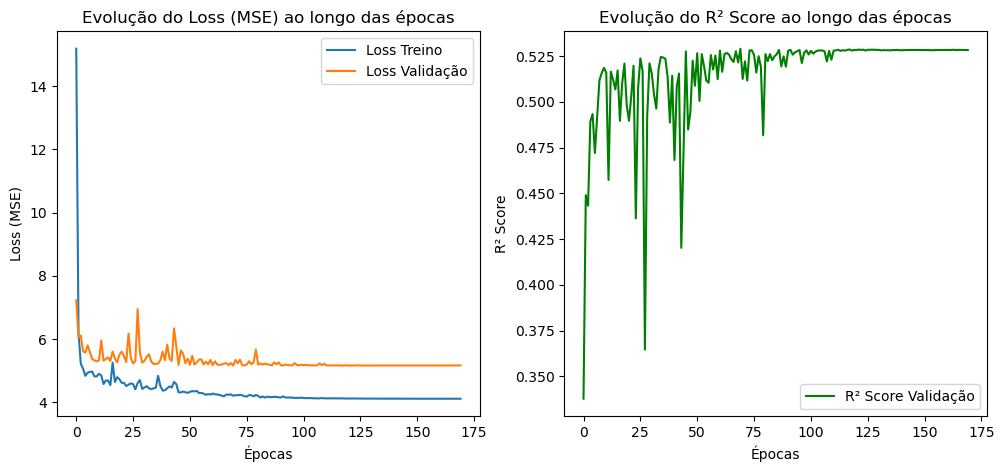

In [101]:
plt.figure(figsize=(12,5))

# Gráfico do Loss
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Loss Treino')
plt.plot(hist.history['val_loss'], label='Loss Validação')
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Evolução do Loss (MSE) ao longo das épocas")
plt.legend()

# Gráfico do R²
plt.subplot(1, 2, 2)
plt.plot(r2_callback.r2_scores, label='R² Score Validação', color='green')
plt.xlabel("Épocas")
plt.ylabel("R² Score")
plt.title("Evolução do R² Score ao longo das épocas")
plt.legend()

plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


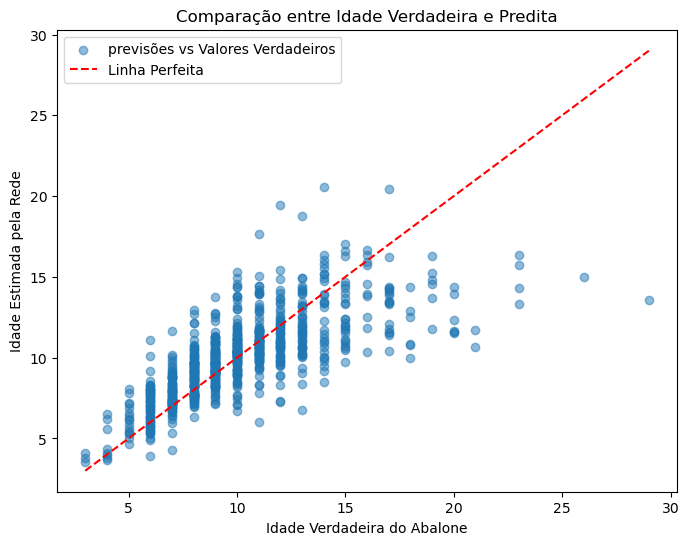

In [102]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(x_test)

# Criar gráfico
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label="previsões vs Valores Verdadeiros")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Linha Perfeita")
plt.xlabel("Idade Verdadeira do Abalone")
plt.ylabel("Idade Estimada pela Rede")
plt.title("Comparação entre Idade Verdadeira e Predita")
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(x_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Raiz do MSE
r2 = r2_score(y_test, y_pred)  # Coeficiente de Determinação

# Mostrar métricas
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
Mean Absolute Error (MAE): 1.5371
Mean Squared Error (MSE): 5.0959
Root Mean Squared Error (RMSE): 2.2574
R² Score: 0.5290
